# WeatherPy
----

### *David Kloepper*
### *Data Visualization Bootcamp, Cohort 3*
### *April 5, 2019*

## Analysis of Results
* As expected, weather is warmer approaching 0 degrees latitude. Given the proximity to the equinox, when the sun is most directly over the equator, it is not surprising to see a balance in temperatures between the northern and sourthern hemispheres. 
* While not nearly as pronounced as with temperature, it does appear that cities near and just south of the equator have higher humidities overall, as compared to cities at greater latitudes. 
* There does not appear to be any relationship between the latitude of a city and the cloudiness or wind speed. It does appear that many cities with high percentages of cloudiness are also experiencing rain.

---



In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Set current date for charting
runTime = time.strftime("%m/%d/%Y", time.localtime())

# Output File (CSV)
output_data_file = "Outputs/citiesWeather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
latList = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngList = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(latList, lngList)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    cityName = city.city_name
    countryCode = city.country_code
    fullCity = cityName + "," + countryCode
    # If the city is unique, then add it to a our cities list
    if fullCity not in cities:
        cities.append(fullCity)

# Print the city count to confirm sufficient count
print(f"Initial number of cities: {len(cities)}")


Initial number of cities: 645


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
#Set endpoint URL and the type of units to return from the API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #imperial = Farhenheit

#Build api url including the API key and units type
query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

#Set lists to hold cities, countries, and weather API results
cityWeather = []
cityList = []
countryList = []

#Set counters for number of searches and number of successes
searchCnt = 0
success = 0

print("Begin API Calls to OpenWeather.org")
print("---------------------------------------")

# Loop through the list of cities and perform request for data on each, printing the result
for fullCity in cities:
    searchCnt += 1
    print(f"Processing record {searchCnt} for the city: {fullCity}")   
    response = requests.get(query_url + fullCity).json()
    cityID = response.get("id")
    if response.get("id"):
        print(f"     Record found for city: {fullCity}    city id: {cityID}")
        cityWeather.append(response)
        citySplit = fullCity.split(",")
        cityList.append(citySplit[0])
        countryList.append(citySplit[1])
        success += 1
    else:
        print(f"     No weather record found for city: {fullCity}")
    time.sleep(.500)
          
print("---------------------------------------")
print("Data Retrieval Complete!")
print(f"Successfully retrieved weather data for {success} out of {searchCnt} cities!")

Begin API Calls to OpenWeather.org
---------------------------------------
Processing record 1 for the city: saint-philippe,re
     Record found for city: saint-philippe,re    city id: 935215
Processing record 2 for the city: codrington,ag
     No weather record found for city: codrington,ag
Processing record 3 for the city: mangochi,mw
     Record found for city: mangochi,mw    city id: 927246
Processing record 4 for the city: ushuaia,ar
     Record found for city: ushuaia,ar    city id: 3833367
Processing record 5 for the city: rikitea,pf
     Record found for city: rikitea,pf    city id: 4030556
Processing record 6 for the city: aflu,dz
     No weather record found for city: aflu,dz
Processing record 7 for the city: bredasdorp,za
     Record found for city: bredasdorp,za    city id: 1015776
Processing record 8 for the city: emerald,au
     Record found for city: emerald,au    city id: 2167426
Processing record 9 for the city: bull savanna,jm
     Record found for city: bull savanna,

Processing record 79 for the city: hithadhoo,mv
     Record found for city: hithadhoo,mv    city id: 1282256
Processing record 80 for the city: usinsk,ru
     Record found for city: usinsk,ru    city id: 863061
Processing record 81 for the city: litovko,ru
     Record found for city: litovko,ru    city id: 2020738
Processing record 82 for the city: ust-kamchatsk,ru
     No weather record found for city: ust-kamchatsk,ru
Processing record 83 for the city: saskylakh,ru
     Record found for city: saskylakh,ru    city id: 2017155
Processing record 84 for the city: severo-kurilsk,ru
     Record found for city: severo-kurilsk,ru    city id: 2121385
Processing record 85 for the city: puerto ayora,ec
     Record found for city: puerto ayora,ec    city id: 3652764
Processing record 86 for the city: chokurdakh,ru
     Record found for city: chokurdakh,ru    city id: 2126123
Processing record 87 for the city: hirara,jp
     Record found for city: hirara,jp    city id: 1862505
Processing record 8

     Record found for city: presidencia roque saenz pena,ar    city id: 3840300
Processing record 156 for the city: mahebourg,mu
     Record found for city: mahebourg,mu    city id: 934322
Processing record 157 for the city: mar del plata,ar
     Record found for city: mar del plata,ar    city id: 3863379
Processing record 158 for the city: kawardha,in
     Record found for city: kawardha,in    city id: 1267369
Processing record 159 for the city: altay,cn
     Record found for city: altay,cn    city id: 1529651
Processing record 160 for the city: sorong,id
     Record found for city: sorong,id    city id: 1626542
Processing record 161 for the city: georgetown,sh
     Record found for city: georgetown,sh    city id: 2411397
Processing record 162 for the city: mehriz,ir
     Record found for city: mehriz,ir    city id: 124274
Processing record 163 for the city: coihaique,cl
     Record found for city: coihaique,cl    city id: 3894426
Processing record 164 for the city: atlantic city,us
 

Processing record 232 for the city: zinder,ne
     Record found for city: zinder,ne    city id: 2437798
Processing record 233 for the city: conceicao do araguaia,br
     Record found for city: conceicao do araguaia,br    city id: 3401845
Processing record 234 for the city: biak,id
     Record found for city: biak,id    city id: 1637001
Processing record 235 for the city: lolua,tv
     No weather record found for city: lolua,tv
Processing record 236 for the city: zhezkazgan,kz
     Record found for city: zhezkazgan,kz    city id: 1516589
Processing record 237 for the city: vologda,ru
     Record found for city: vologda,ru    city id: 472459
Processing record 238 for the city: kaeo,nz
     Record found for city: kaeo,nz    city id: 2189343
Processing record 239 for the city: pringsewu,id
     Record found for city: pringsewu,id    city id: 1630639
Processing record 240 for the city: bilma,ne
     Record found for city: bilma,ne    city id: 2446796
Processing record 241 for the city: prov

     Record found for city: coracao de jesus,br    city id: 3465542
Processing record 308 for the city: paungde,mm
     Record found for city: paungde,mm    city id: 1300969
Processing record 309 for the city: auki,sb
     Record found for city: auki,sb    city id: 2109701
Processing record 310 for the city: torbay,ca
     Record found for city: torbay,ca    city id: 6167817
Processing record 311 for the city: rena,no
     Record found for city: rena,no    city id: 3141982
Processing record 312 for the city: nha trang,vn
     Record found for city: nha trang,vn    city id: 1572151
Processing record 313 for the city: ballina,au
     Record found for city: ballina,au    city id: 2177069
Processing record 314 for the city: san francisco,ar
     Record found for city: san francisco,ar    city id: 3837675
Processing record 315 for the city: iqaluit,ca
     Record found for city: iqaluit,ca    city id: 5983720
Processing record 316 for the city: caborca,mx
     Record found for city: caborca

Processing record 384 for the city: nadym,ru
     Record found for city: nadym,ru    city id: 1498087
Processing record 385 for the city: aksu,cn
     Record found for city: aksu,cn    city id: 1529660
Processing record 386 for the city: miraflores,co
     Record found for city: miraflores,co    city id: 3674735
Processing record 387 for the city: raudeberg,no
     Record found for city: raudeberg,no    city id: 3146487
Processing record 388 for the city: churapcha,ru
     Record found for city: churapcha,ru    city id: 2025241
Processing record 389 for the city: am timan,td
     Record found for city: am timan,td    city id: 245338
Processing record 390 for the city: siilinjarvi,fi
     Record found for city: siilinjarvi,fi    city id: 636947
Processing record 391 for the city: rabaul,pg
     Record found for city: rabaul,pg    city id: 2087894
Processing record 392 for the city: ust-barguzin,ru
     Record found for city: ust-barguzin,ru    city id: 2013986
Processing record 393 for 

     Record found for city: goundam,ml    city id: 2456917
Processing record 461 for the city: vao,nc
     Record found for city: vao,nc    city id: 2137773
Processing record 462 for the city: gogrial,sd
     No weather record found for city: gogrial,sd
Processing record 463 for the city: lompoc,us
     Record found for city: lompoc,us    city id: 5367788
Processing record 464 for the city: portland,au
     Record found for city: portland,au    city id: 2152668
Processing record 465 for the city: rafraf,tn
     Record found for city: rafraf,tn    city id: 2467813
Processing record 466 for the city: amderma,ru
     No weather record found for city: amderma,ru
Processing record 467 for the city: aitape,pg
     Record found for city: aitape,pg    city id: 2101169
Processing record 468 for the city: huanren,cn
     Record found for city: huanren,cn    city id: 2036713
Processing record 469 for the city: anchorage,us
     Record found for city: anchorage,us    city id: 5879400
Processing re

Processing record 537 for the city: sebrovo,ru
     Record found for city: sebrovo,ru    city id: 497995
Processing record 538 for the city: slave lake,ca
     Record found for city: slave lake,ca    city id: 6149374
Processing record 539 for the city: margate,za
     Record found for city: margate,za    city id: 978895
Processing record 540 for the city: galiwinku,au
     No weather record found for city: galiwinku,au
Processing record 541 for the city: inuvik,ca
     Record found for city: inuvik,ca    city id: 5983607
Processing record 542 for the city: okakarara,na
     Record found for city: okakarara,na    city id: 3354876
Processing record 543 for the city: iracoubo,gf
     Record found for city: iracoubo,gf    city id: 3381428
Processing record 544 for the city: vila franca do campo,pt
     Record found for city: vila franca do campo,pt    city id: 3372472
Processing record 545 for the city: esmeraldas,ec
     Record found for city: esmeraldas,ec    city id: 3652065
Processing 

     Record found for city: muyezerskiy,ru    city id: 524100
Processing record 614 for the city: rothes,gb
     Record found for city: rothes,gb    city id: 2639086
Processing record 615 for the city: gamba,ga
     Record found for city: gamba,ga    city id: 2400547
Processing record 616 for the city: kudat,my
     Record found for city: kudat,my    city id: 1736458
Processing record 617 for the city: acapulco,mx
     Record found for city: acapulco,mx    city id: 3533462
Processing record 618 for the city: panaba,mx
     Record found for city: panaba,mx    city id: 3521972
Processing record 619 for the city: angoram,pg
     Record found for city: angoram,pg    city id: 2100765
Processing record 620 for the city: rio grande,br
     Record found for city: rio grande,br    city id: 3451138
Processing record 621 for the city: uglovskoye,ru
     Record found for city: uglovskoye,ru    city id: 1488632
Processing record 622 for the city: piopio,nz
     Record found for city: piopio,nz    c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Use list comprehension to create lists for each of the relevant data elements from the API calls

lats = [result["coord"]["lat"] for result in cityWeather]
lngs = [result["coord"]["lon"] for result in cityWeather]
maxTemps = [result["main"]["temp"] for result in cityWeather]
humids = [result["main"]["humidity"] for result in cityWeather]
clouds =[result["clouds"]["all"] for result in cityWeather]
winds = [result["wind"]["speed"] for result in cityWeather]
dates = [result["dt"] for result in cityWeather]
weatherStates = [result["weather"][0]["main"] for result in cityWeather]


#Print the count from each list
print (f"City       {len(cityList)}")
print (f"Cloudiness {len(clouds)}")
print (f"Country    {len(countryList)}")
print (f"Date       {len(dates)}")
print (f"Humidity   {len(humids)}")
print (f"Lat        {len(lats)}")
print (f"Long       {len(lngs)}")
print (f"Max Temp   {len(maxTemps)}")
print (f"Wind Speed {len(winds)}")
print (f"Weather    {len(weatherStates)}")

City       566
Cloudiness 566
Country    566
Date       566
Humidity   566
Lat        566
Long       566
Max Temp   566
Wind Speed 566
Weather    566


In [8]:
#Put the lists of cities and weather together into a dataframe
weatherData = pd.DataFrame({"City":cityList,
                             "Cloudiness":clouds,
                            "Country":countryList,
                             "Date":dates,
                             "Humidity":humids,
                            "Lat":lats,
                            "Lng":lngs,
                            "Max Temp":maxTemps,
                            "Wind Speed":winds,
                           "Weather":weatherStates})

#Export the dataframe to a CSV file
weatherData.to_csv(output_data_file, encoding='utf-8')

#Print rows of the dataframe
weatherData.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Weather
0,saint-philippe,56,re,1554526511,78,-21.36,55.77,76.93,19.46,Clouds
1,mangochi,48,mw,1554526541,76,-14.48,35.26,73.94,3.60,Clouds
2,ushuaia,40,ar,1554523200,94,-54.81,-68.31,37.40,24.16,Clouds
3,rikitea,80,pf,1554526542,100,-23.12,-134.97,77.54,16.02,Clouds
4,bredasdorp,0,za,1554525986,93,-34.53,20.04,55.06,3.36,Clear


In [9]:
#For a fun extra element, the current weather status is included in the dataframe and dots on the scatter plot
#will be colored accordingly to see if any additional trends can be identified in the plots

#Set colors that will be used on plots, based on the weather condition groups. Any value not specified is considered "Other"
col = np.where(weatherData["Weather"]=="Thunderstorm",'purple',
               np.where(weatherData["Weather"]=="Drizzle",'cornflowerblue', #FightClub
                        np.where(weatherData["Weather"]=="Rain",'darkblue',
                                 np.where(weatherData["Weather"]=="Snow",'lightgray',
                                          np.where(weatherData["Weather"]=="Clear",'skyblue',
                                                   np.where(weatherData["Weather"]=="Clouds",'darkgrey','tan'))))))

#Manually set fake plots that can be referenced when building a legend for the scatter plot
legThunder = plt.Line2D([0,0],[0,1], color='purple', marker='o', linestyle='')
legRain = plt.Line2D([0,0],[0,1], color='darkblue', marker='o', linestyle='')
legClear = plt.Line2D([0,0],[0,1], color='skyblue', marker='o', linestyle='')
legDrizzle = plt.Line2D([0,0],[0,1], color='cornflowerblue', marker='o', linestyle='')
legSnow = plt.Line2D([0,0],[0,1], color='lightgray', marker='o', linestyle='')
legClouds = plt.Line2D([0,0],[0,1], color='darkgrey', marker='o', linestyle='')
legOther = plt.Line2D([0,0],[0,1], color='tan', marker='o', linestyle='')

#List the unique weather condition groups present in the data
weatherData["Weather"].unique()

array(['Clouds', 'Clear', 'Mist', 'Rain', 'Drizzle', 'Snow', 'Fog',
       'Haze'], dtype=object)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

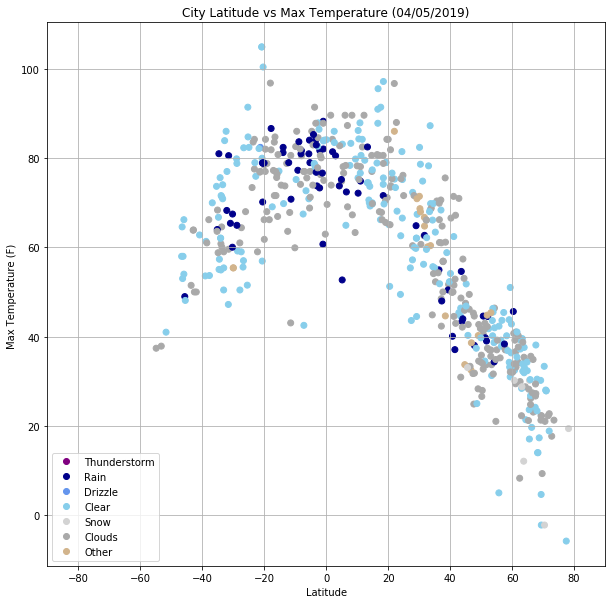

In [10]:
# Latitude vs Max Temp

#Set larger figure size
plt.figure(figsize=(10,10))

plt.scatter(weatherData["Lat"], weatherData["Max Temp"], color=col, marker='o')

# Add chart labels
plt.title(f"City Latitude vs Max Temperature ({runTime})")
plt.ylabel("Max Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

#Add a legend using the fake plots to give context to the plot colors
plt.legend([legThunder,legRain,legDrizzle,legClear,legSnow,legClouds,legOther], 
           ["Thunderstorm", "Rain", "Drizzle","Clear","Snow","Clouds","Other"], loc="lower left")

# Save the figure
plt.savefig("Outputs/Latitude_vs_MaxTemp.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

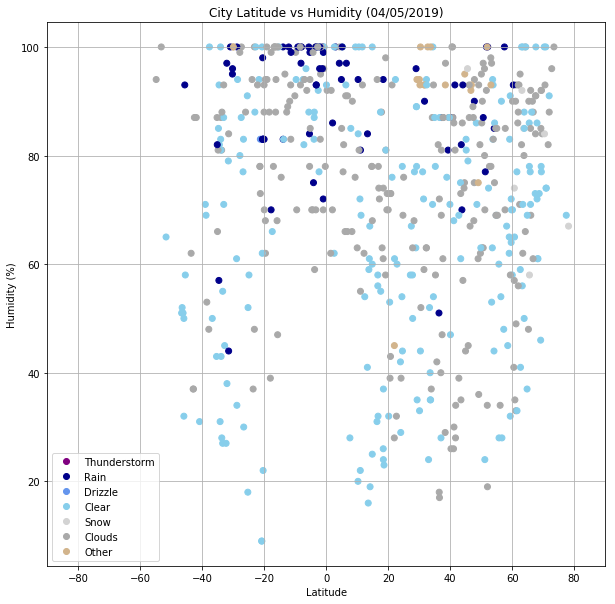

In [11]:
# Latitude vs Humidity
plt.figure(figsize=(10,10))

plt.scatter(weatherData["Lat"], weatherData["Humidity"], color=col, marker="o")

# Add chart labels
plt.title(f"City Latitude vs Humidity ({runTime})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

#Add a legend using the fake plots to give context to the plot colors
plt.legend([legThunder,legRain,legDrizzle,legClear,legSnow,legClouds,legOther], 
           ["Thunderstorm", "Rain", "Drizzle","Clear","Snow","Clouds","Other"], loc="lower left")

# Save the figure
plt.savefig("Outputs/Latitude_vs_Humidity.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

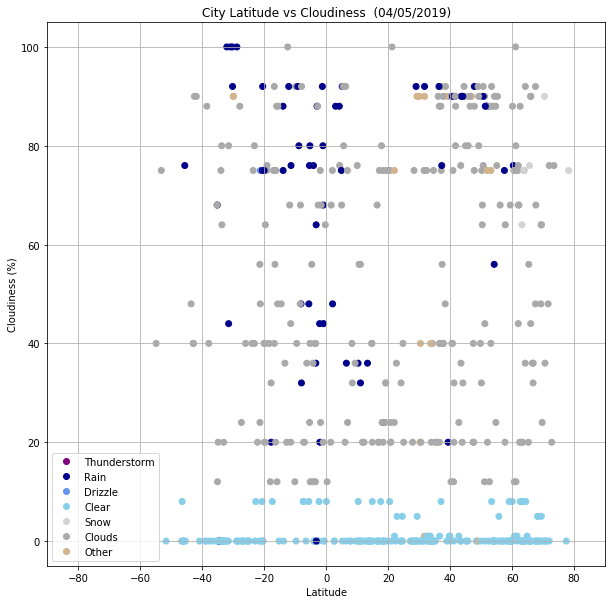

In [12]:
# Latitude vs Cloudiness
plt.figure(figsize=(10,10))
plt.scatter(weatherData["Lat"], weatherData["Cloudiness"], color=col, marker="o")

# Add chart labels
plt.title(f"City Latitude vs Cloudiness  ({runTime})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

#Add a legend using the fake plots to give context to the plot colors
plt.legend([legThunder,legRain,legDrizzle,legClear,legSnow,legClouds,legOther], 
           ["Thunderstorm", "Rain", "Drizzle","Clear","Snow","Clouds","Other"], loc="lower left")

# Save the figure
plt.savefig("Outputs/Latitude_vs_Cloudiness.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

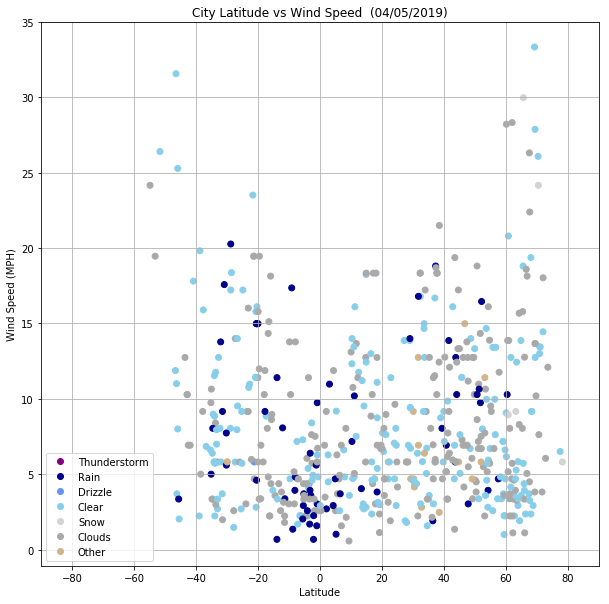

In [13]:
# Latitude vs Wind Speed
plt.figure(figsize=(10,10))
plt.scatter(weatherData["Lat"], weatherData["Wind Speed"], color=col, marker="o")

# Add chart labels
plt.title(f"City Latitude vs Wind Speed  ({runTime})")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

#Add a legend using the fake plots to give context to the plot colors
plt.legend([legThunder,legRain,legDrizzle,legClear,legSnow,legClouds,legOther], 
           ["Thunderstorm", "Rain", "Drizzle","Clear","Snow","Clouds","Other"], loc="lower left")

# Save the figure
plt.savefig("Outputs/Latitude_vs_WindSpeed.png")
# Show plot
plt.show()